Diabetes Detection System using Machine Learning and Deep Learning

In [ ]:
#1.Data Loading and Initial Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/project/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

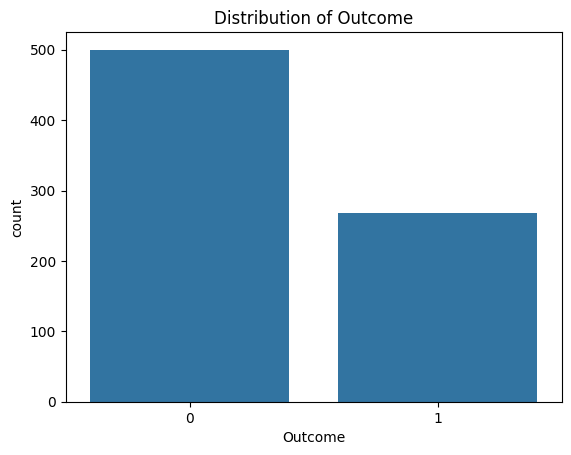

In [ ]:
sns.countplot(x="Outcome", data=df)
plt.title("Distribution of Outcome")
plt.show()

In [ ]:
#2.Data Preprocessing
# Handle Invalid Zeros
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, pd.NA)
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())

<ipython-input-6-91884408710a>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

X = df.drop("Outcome", axis=1)
y = df["Outcome"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

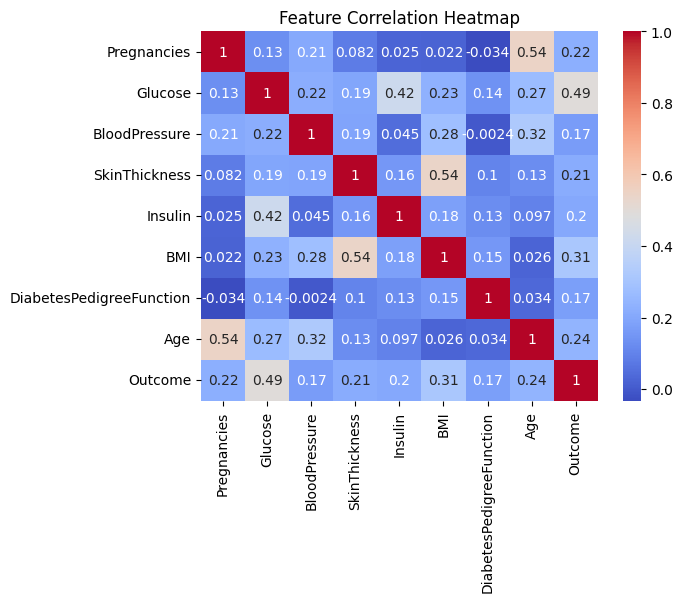

In [ ]:
#3. Visualizations (EDA)
# Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

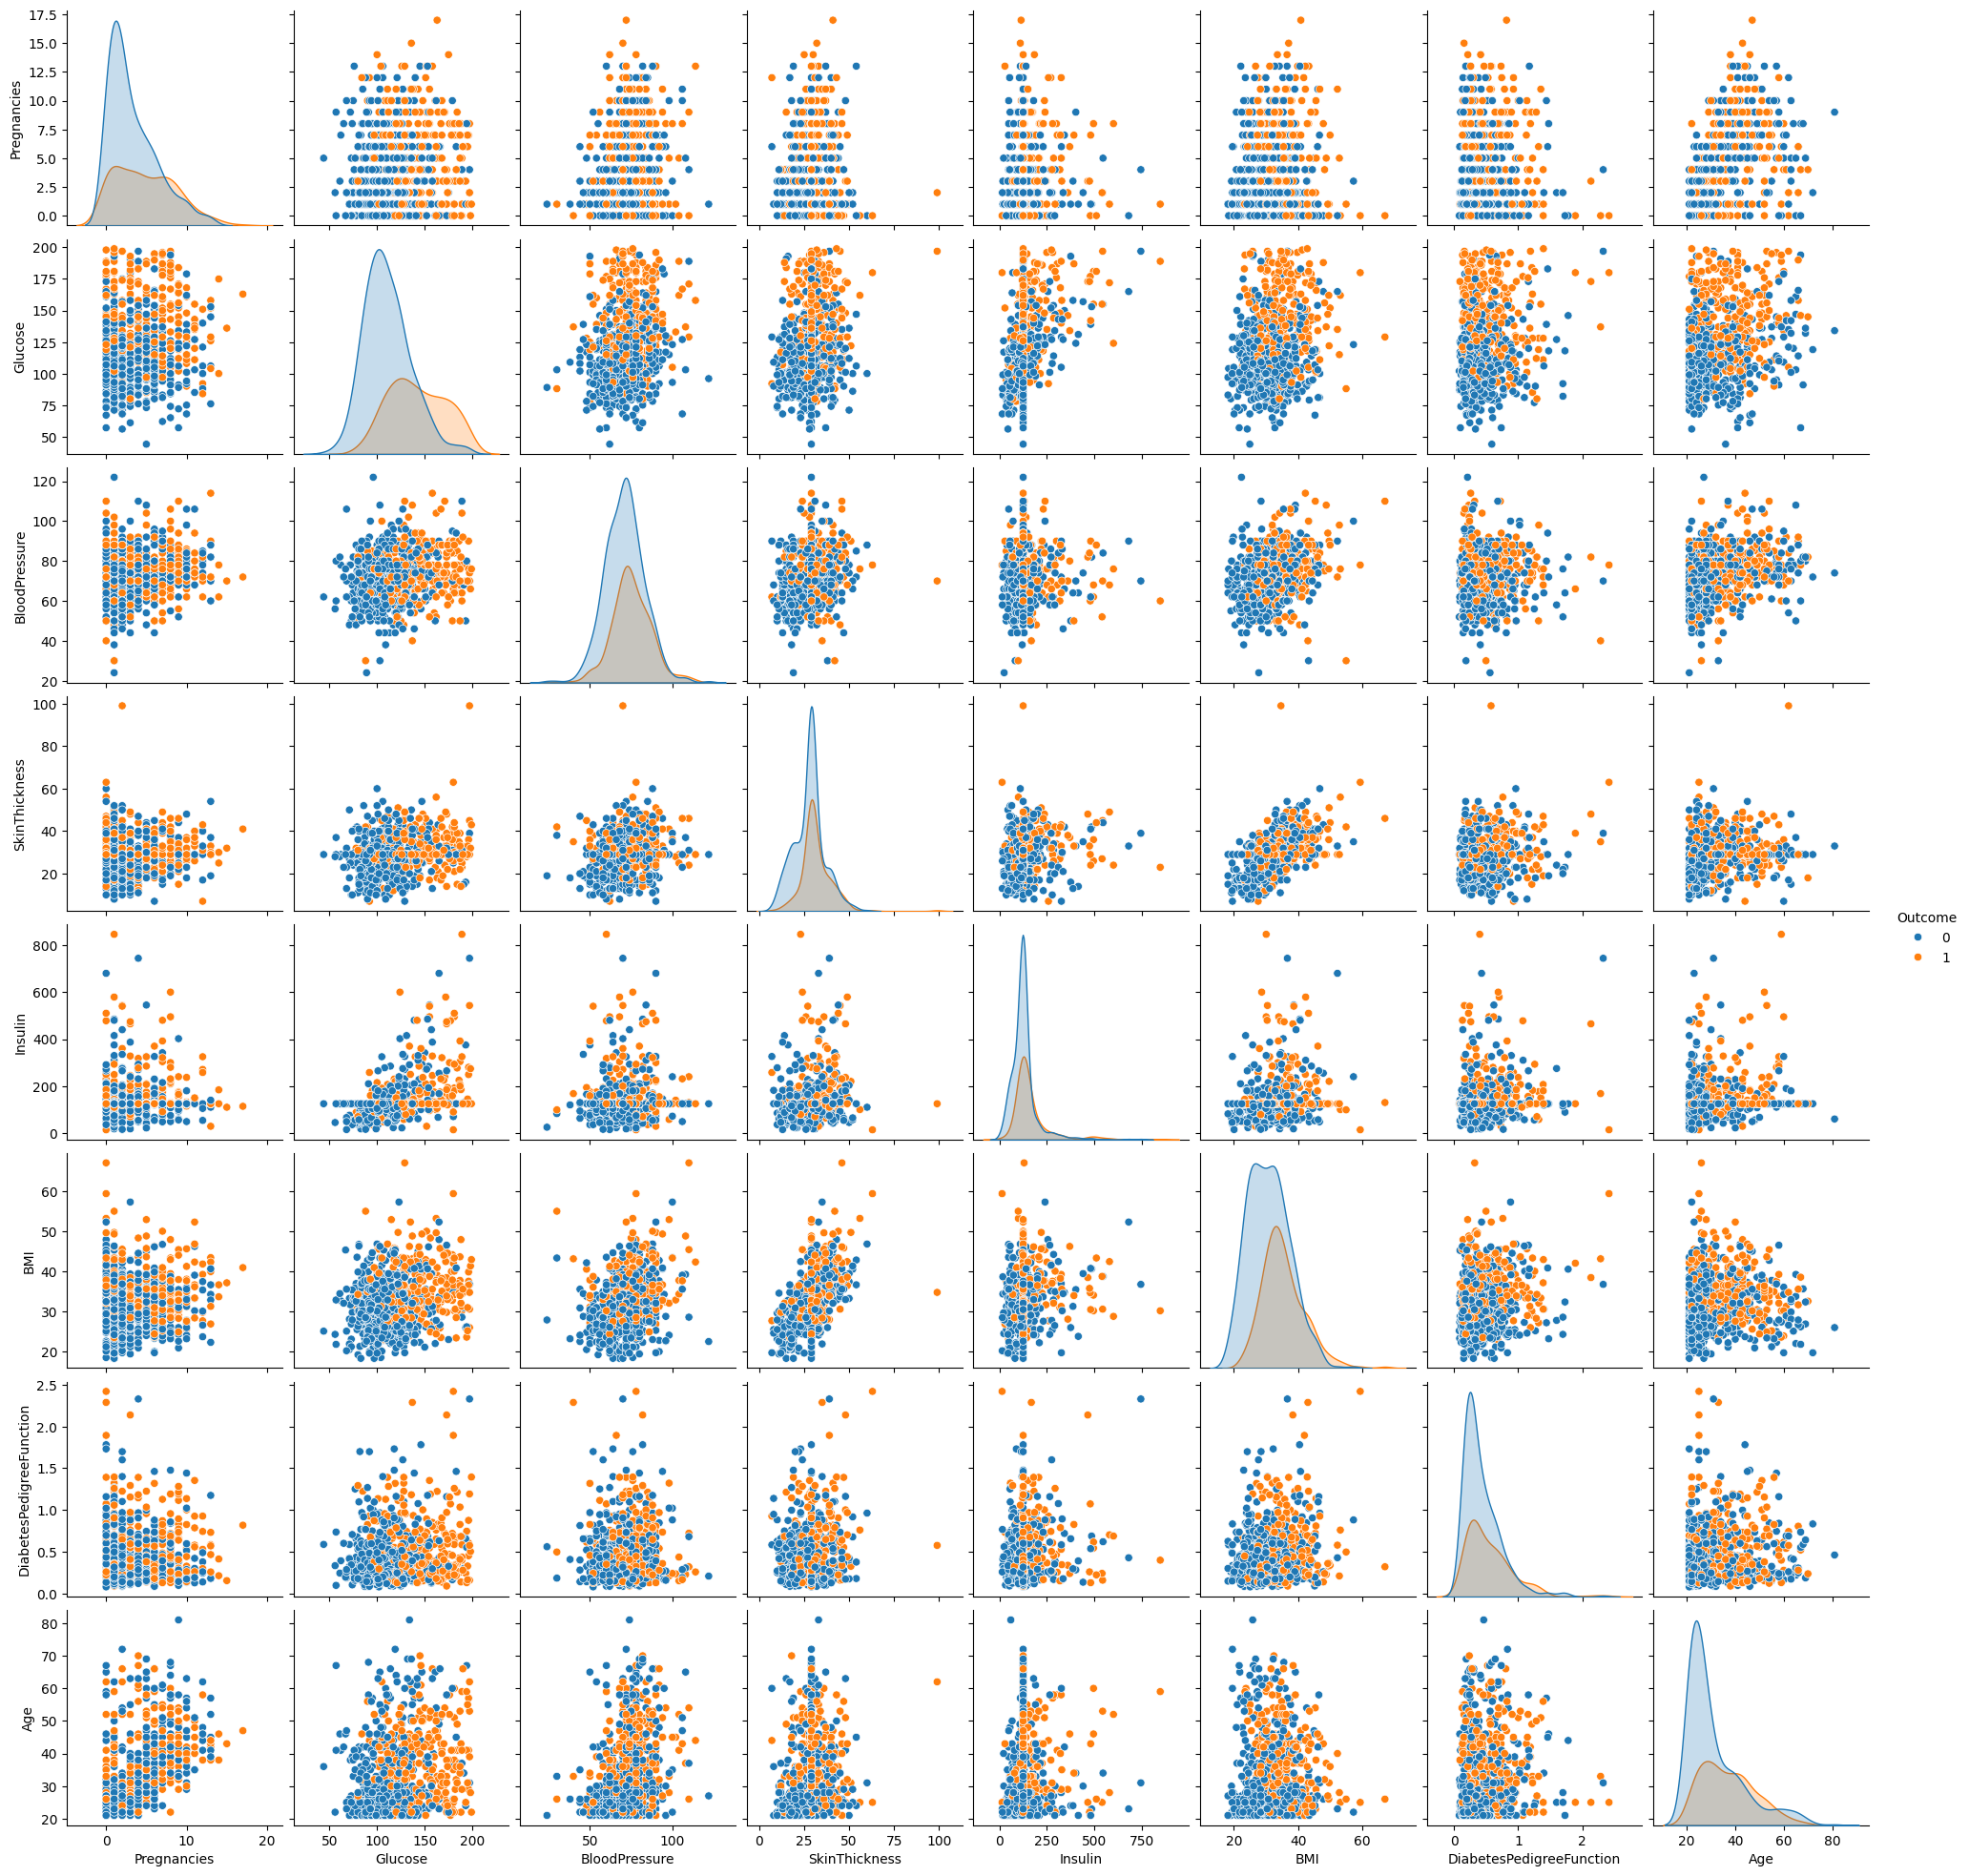

In [ ]:
# Pair Plot
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

<ipython-input-11-6cfce521e5cc>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Outcome', shade=True)


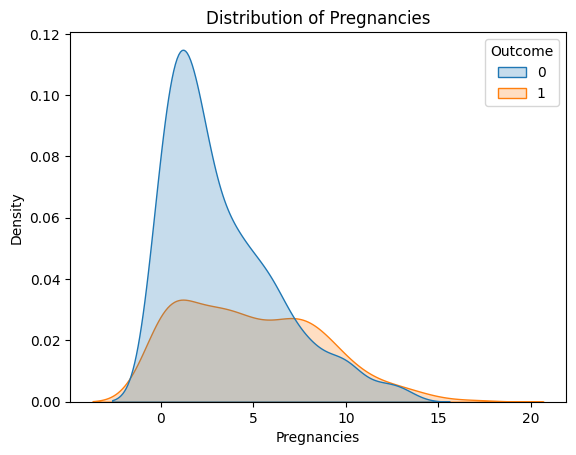

<ipython-input-11-6cfce521e5cc>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Outcome', shade=True)


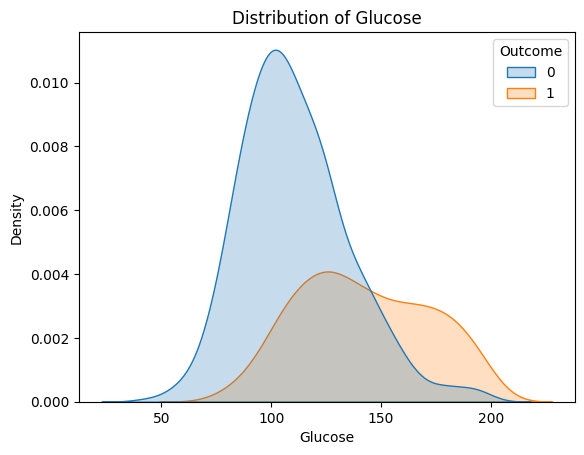

<ipython-input-11-6cfce521e5cc>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Outcome', shade=True)


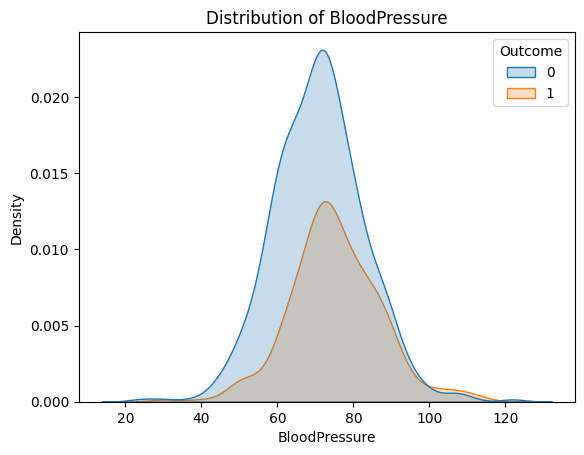

<ipython-input-11-6cfce521e5cc>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Outcome', shade=True)


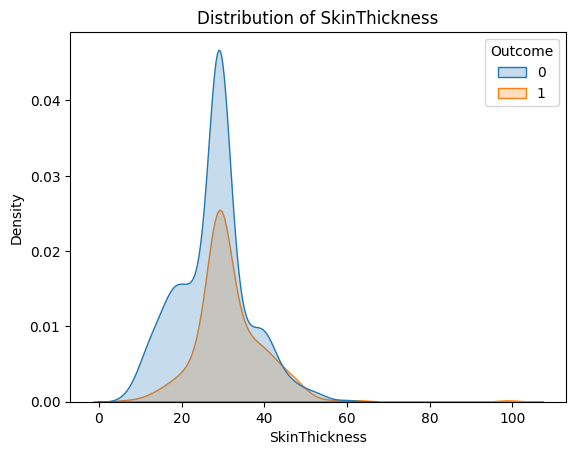

<ipython-input-11-6cfce521e5cc>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Outcome', shade=True)


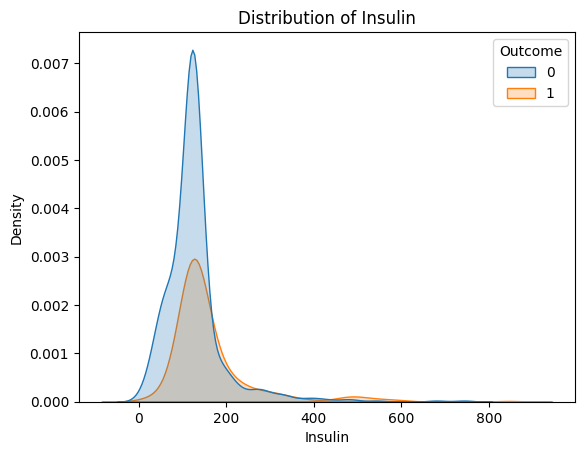

<ipython-input-11-6cfce521e5cc>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Outcome', shade=True)


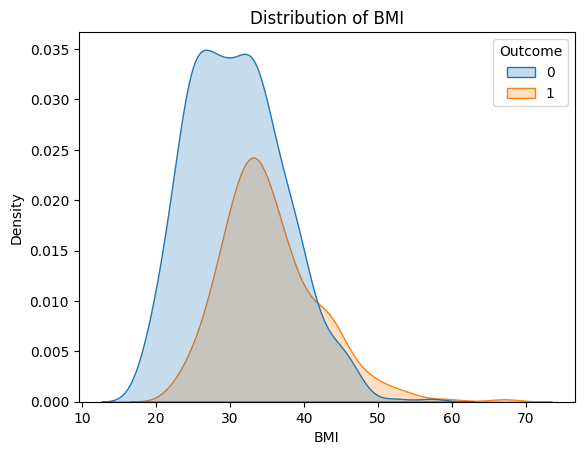

<ipython-input-11-6cfce521e5cc>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Outcome', shade=True)


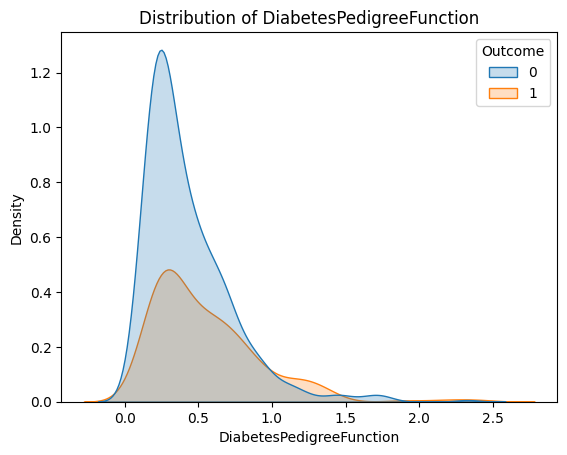

<ipython-input-11-6cfce521e5cc>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Outcome', shade=True)


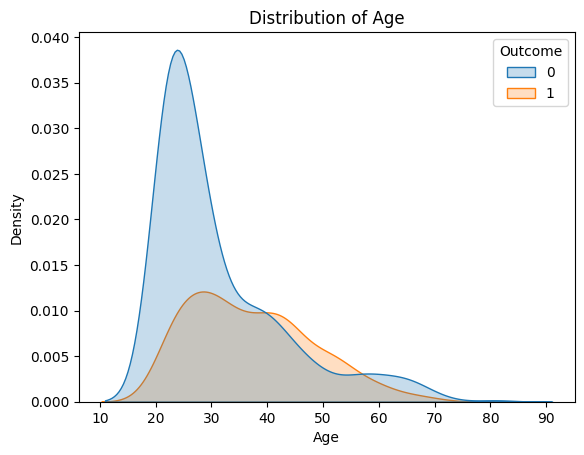

In [ ]:
# Distribution Plots
for col in df.columns[:-1]:
    sns.kdeplot(data=df, x=col, hue='Outcome', shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
# 4. Machine Learning Models (with Hyperparameter Tuning)
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10]}
grid_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10]})

In [ ]:
# Random Forest with Tuning
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100, 200], 'max_depth': [4, 6, 8]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'n_estimators': [100, 200]})

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.64      0.46      0.54        54

    accuracy                           0.72       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.71      0.72      0.71       154



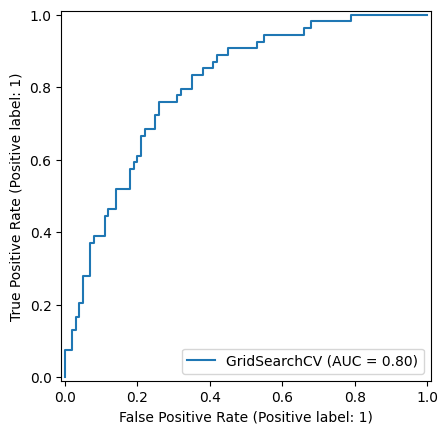

In [ ]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

y_pred_rf = grid_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
RocCurveDisplay.from_estimator(grid_rf, X_test, y_test)
plt.show()

In [ ]:
# Deep Learning Model
# Improved Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5819 - loss: 0.6791 - val_accuracy: 0.7317 - val_loss: 0.5687
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7472 - loss: 0.5625 - val_accuracy: 0.7642 - val_loss: 0.5095
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7677 - loss: 0.5030 - val_accuracy: 0.7805 - val_loss: 0.4736
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7561 - loss: 0.4982 - val_accuracy: 0.7805 - val_loss: 0.4563
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7924 - loss: 0.4430 - val_accuracy: 0.7805 - val_loss: 0.4456
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7698 - loss: 0.4487 - val_accuracy: 0.7967 - val_loss: 0.4382
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7940 - loss: 0.4297 - val_accuracy: 0.8049 - val_loss: 0.4333
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7981 - loss: 0.4495 - val_accuracy: 0.8130 - val_loss: 0.

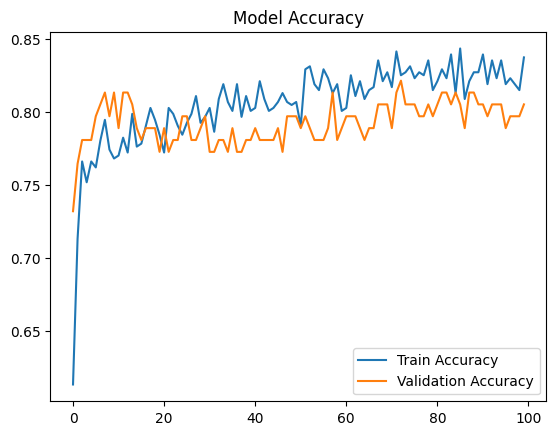

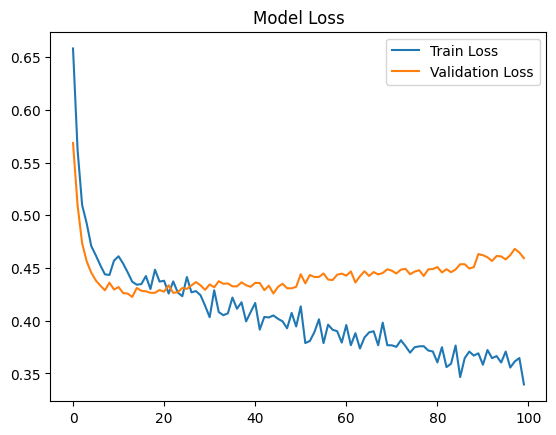

In [ ]:
# Plot Accuracy/Loss Curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()